In [36]:
#!/usr/bin/env python
################################################################
#  Copyright (C) 2015 OpenEye Scientific Software, Inc.
################################################################
from __future__ import print_function
import os, sys
import pandas as pd
import scipy.stats as stats
import scipy as sci
import numpy as np
import pylab
get_ipython().magic(u'matplotlib inline')

In [37]:
import openeye.oechem as oechem
import openeye.oedepict as oedepict
from IPython.display import display

In [52]:
def depictMatch(mol, match, supH = True, width=500, height=200):
    from IPython.display import Image
    dopt = oedepict.OEPrepareDepictionOptions()
    dopt.SetDepictOrientation( oedepict.OEDepictOrientation_Horizontal)
    dopt.SetSuppressHydrogens(supH)
    oedepict.OEPrepareDepiction(mol, dopt)
    opts = oedepict.OE2DMolDisplayOptions(width, height, oedepict.OEScale_AutoScale)
    disp = oedepict.OE2DMolDisplay(mol, opts)
    hstyle = oedepict.OEHighlightStyle_Color
    hcolor = oechem.OEColor(oechem.OELightBlue)
    oedepict.OEAddHighlighting(disp, hcolor, hstyle, match)
    img = oedepict.OEImage(width, height)
    oedepict.OERenderMolecule(img,disp)
    return Image(oedepict.OEWriteImageToString("png",img))

In [49]:
#Smarts = "[#1$(*-[#6]([#8])[#8])]"
Smarts = "[#8H1:1]-[#6:2]-[#6:3]-[#8H0:4]"
#Smarts = "[#1:1]~[#6]~[#8]"
#Smarts = '[*D:1]'
#Smarts = '[*r:1]'
#Smarts = '[*:1]~[#6X3:2](~[*:3])~[*:4]'
#Smarts = '[#1:1]'
qmol = oechem.OEQMol()
if not oechem.OEParseSmarts( qmol, Smarts ):
    print( 'OEParseSmarts failed')
ss = oechem.OESubSearch( qmol)

In [50]:
fileprefix= 'AlkEthOH_dvrs1'
ifs = oechem.oemolistream(fileprefix+'.oeb')
ifs = oechem.oemolistream()
ofs = oechem.oemolostream(fileprefix+'_filt1.smi')

#ifs = oechem.oemolistream('benzene.mol2')
ifs = oechem.oemolistream('AlkEthOH_dvrs1.oeb')
flavor = oechem.OEIFlavor_Generic_Default | oechem.OEIFlavor_MOL2_Default | oechem.OEIFlavor_MOL2_Forcefield
ifs.SetFlavor( oechem.OEFormat_MOL2, flavor)

True

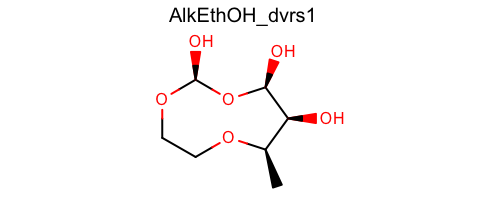

<openeye.oechem.OEMatchBase; proxy of <Swig Object of type 'OEChem::OEMatchBase *' at 0x1101ecea0> >
10 2 3 7 
1 2 3 4 

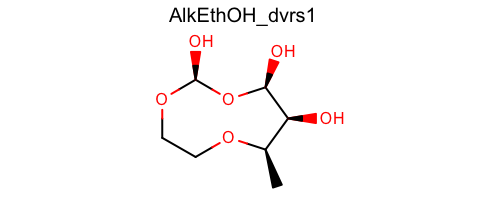

<openeye.oechem.OEMatchBase; proxy of <Swig Object of type 'OEChem::OEMatchBase *' at 0x11253a720> >
10 2 4 9 
1 2 3 4 

In [51]:
mol = oechem.OEMol()
for mol in ifs.GetOEMols():
    goodMol = True
    oechem.OEPrepareSearch(mol, ss)
    unique = True
    i = 0
    for match in ss.Match(mol, unique):
        i += 1
        save_output = "/Users/bannanc/Desktop/torsionsNoH_%i.pdf" % i
        display( depictMatch(mol, match, True) )
        print(match)
        for ma in match.GetAtoms():
            print(ma.target.GetIdx(), end=" ")
        print('')
        for ma in match.GetAtoms():
            print(ma.pattern.GetMapIdx(), end=" ")

In [46]:
ifs.close()